# Medical Appointment No Shows Capstone

## 2. Data Wrangling
- Collect, organize, define, and clean relevant datasets.

## Data Collection

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing datetime
from datetime import datetime as dt
from datetime import timedelta

# File system manangement
import os,sys

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#Interactive Shell
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

#Pandas profiling
from pandas_profiling import ProfileReport

import missingno as msno
import re 

%matplotlib inline

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone


In [3]:
os.listdir(cwd)
#os.listdir( os.getcwd() )

['.DS_Store',
 'LICENSE',
 '3_ExploratoryDataAnalysis.ipynb',
 '4_Preprocessing.ipynb',
 '5.1_DecisionTreeModeling.ipynb',
 '2_DataWrangling.ipynb',
 'data2016.csv',
 'models',
 'README.md',
 'img',
 'df_excel.xlsx',
 '.gitignore',
 'figures',
 '6_Documentation.ipynb',
 '.ipynb_checkpoints',
 '.git',
 'data',
 '5_Modeling.ipynb']

### Load the Data from CSV File

In [4]:
# Import CSV file and read the dataset
path = 'data2016.csv'
df = pd.read_csv(path, index_col=None, parse_dates=True) #parse_dates=True
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Dimensions of the dataset. #(samples,features)
print("There are", df.shape[0], "Rows(Observations).")
print("There are", df.shape[1], "Columns(Features).")
df.shape

There are 110527 Rows(Observations).
There are 14 Columns(Features).


(110527, 14)

## Data Organization

#### Create SubFolders

In [6]:
newfolder = "/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/data"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory /Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/data failed


In [7]:
newfolder = "/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/figures"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory /Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/figures failed


In [8]:
newfolder = "/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/models"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory /Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/models failed


---

## Data Definition

#### Explore the Data

In [9]:
# Get DataFrame Information
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values. AppointmentDay and ScheduledDay should be converted to datetime. There are 3 objects (Gender, Neighborhood, and No-show)

#### Rename Columns

In [10]:
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [11]:
df = df.rename(columns = { "AppointmentID":"AppointmentId", 
                          "Neighbourhood": "Neighborhood", 
                          "Hipertension": "Hypertension", 
                          "Handcap":"Handicap", 
                          "SMS_received":"SMSSent", 
                          "No-show":"NoShow"})

#### Count of unique values or codes

In [12]:
df.count()

PatientId         110527
AppointmentId     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighborhood      110527
Scholarship       110527
Hypertension      110527
Diabetes          110527
Alcoholism        110527
Handicap          110527
SMSSent           110527
NoShow            110527
dtype: int64

In [13]:
print('Gender:',df.Gender.unique()) 
print('Age:',sorted(df.Age.unique())) 
print('Neighborhood:',df.Neighborhood.unique()) 
print('Scholarship:',df.Scholarship.unique()) 
print('Hypertension:',df.Hypertension.unique()) 
print('Diabetes:',df.Diabetes.unique()) 
print('Alcoholism:',df.Alcoholism.unique()) 
print('Handicap:',df.Handicap.unique()) 
print('SMSSent:',df.SMSSent.unique()) 
print('NoShow:', df.NoShow.unique()) 

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighborhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃ

In [14]:
df.count()

PatientId         110527
AppointmentId     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighborhood      110527
Scholarship       110527
Hypertension      110527
Diabetes          110527
Alcoholism        110527
Handicap          110527
SMSSent           110527
NoShow            110527
dtype: int64

In [15]:
#Get summary of missingness
df.isna().sum()

#df.notnull().any()
#df.isnull().values.any() 

PatientId         0
AppointmentId     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSSent           0
NoShow            0
dtype: int64

In [16]:
df.pivot_table(values='Age', index=['Neighborhood','Gender'], columns=['SMSSent','NoShow'])

SMSSent                         0                     1           
NoShow                         No        Yes         No        Yes
Neighborhood    Gender                                            
AEROPORTO       F       54.000000  37.000000        NaN        NaN
                M       55.000000        NaN  62.000000        NaN
ANDORINHAS      F       38.099773  38.295154  39.231373  33.025424
                M       32.115385  33.737288  34.492647  30.551724
ANTÔNIO HONÓRIO F       45.426966  31.882353  38.910714  25.818182
...                           ...        ...        ...        ...
TABUAZEIRO      M       31.056548  27.568000  35.601695  29.090909
UNIVERSITÁRIO   F       42.156863  41.647059  39.250000  37.400000
                M       43.576923  46.333333  57.857143  34.000000
VILA RUBIM      F       49.984026  36.878788  45.255435  39.215686
                M       40.000000  35.727273  41.316667  34.541667

[159 rows x 4 columns]

In [17]:
df.describe(include="all")

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [18]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,110527,NaN,NaN,NaN,1.47496e+14,2.56095e+14,39217.8,4.17261e+12,3.17318e+13,9.43917e+13,9.99982e+14
AppointmentId,110527,NaN,NaN,NaN,5.67531e+06,71295.8,5.03023e+06,5.64029e+06,5.68057e+06,5.72552e+06,5.79048e+06
Gender,110527,2,F,71840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,110527,NaN,NaN,NaN,37.0889,23.1102,-1,18,37,55,115
Neighborhood,110527,81,JARDIM CAMBURI,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,110527,NaN,NaN,NaN,0.0982656,0.297675,0,0,0,0,1
Hypertension,110527,NaN,NaN,NaN,0.197246,0.397921,0,0,0,0,1
Diabetes,110527,NaN,NaN,NaN,0.0718648,0.258265,0,0,0,0,1


In [19]:
print ( df.nunique() / df.shape[0] * 100 )

PatientId          56.365413
AppointmentId     100.000000
Gender              0.001810
ScheduledDay       93.686611
AppointmentDay      0.024428
Age                 0.094095
Neighborhood        0.073285
Scholarship         0.001810
Hypertension        0.001810
Diabetes            0.001810
Alcoholism          0.001810
Handicap            0.004524
SMSSent             0.001810
NoShow              0.001810
dtype: float64


In [20]:
#Counts of null values 
na_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount'] > 0)]

,VarName,NullCount


<AxesSubplot:>

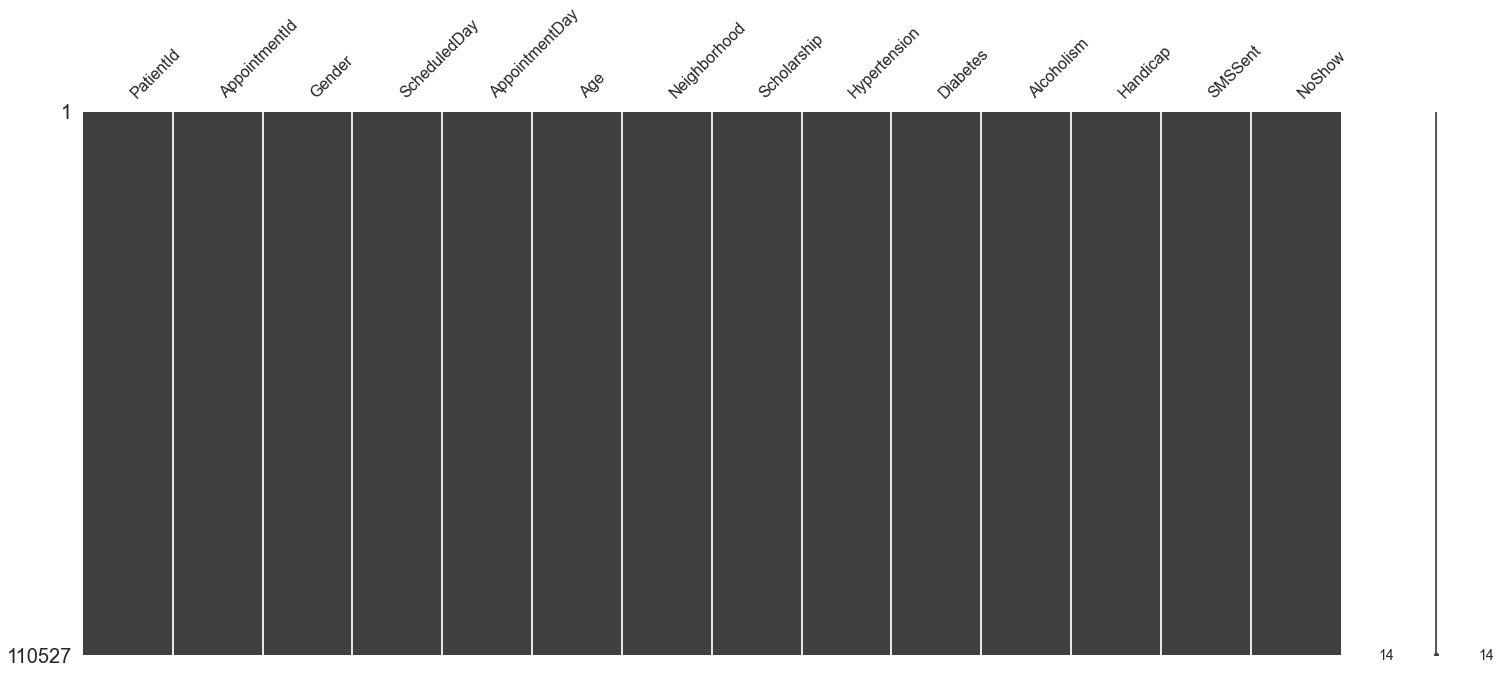

In [21]:
# Visualize Missingness
msno.matrix(df)
plt.show()

---

### Detect Anomalies & Outliers

#### Range of values per column

In [22]:
range = df.aggregate([min, max]).T
print(range)

                                 min                   max
PatientId                    39217.8           9.99982e+14
AppointmentId                5030230               5790484
Gender                             F                     M
ScheduledDay    2015-11-10T07:13:56Z  2016-06-08T20:07:23Z
AppointmentDay  2016-04-29T00:00:00Z  2016-06-08T00:00:00Z
Age                               -1                   115
Neighborhood               AEROPORTO            VILA RUBIM
Scholarship                        0                     1
Hypertension                       0                     1
Diabetes                           0                     1
Alcoholism                         0                     1
Handicap                           0                     4
SMSSent                            0                     1
NoShow                            No                   Yes


## DATA CLEANING

### PatientId and AppointmentId Feature

In [23]:
df['PatientId'] = df['PatientId'].apply(lambda x: str(int(x)));
df['PatientId'] = pd.to_numeric(df['PatientId'])

In [24]:
df['PatientId'].nunique()

62299

In [25]:
df['AppointmentId'].nunique()

110527

From the previous information, some patients made more than one appointment. Both "PatientId" and "AppointmentId" are randomly generated numbers and won't be useful in the modelling section. 

In [26]:
df = df.drop(["AppointmentId"],axis=1)

### Age Feature

In [27]:
print("Unique Values in `Age` => {}".format(np.sort(df.Age.unique())))

Unique Values in `Age` => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


<AxesSubplot:ylabel='Age'>

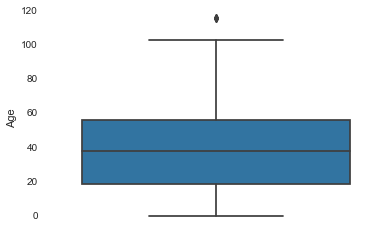

In [28]:
sns.boxplot(data=df, y='Age')

The Patients' Ages are between -1 and 115. So I'm going to filter the dataframe between 0 and 100 years old.

In [29]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 101)]

In [30]:
assert df['Age'].max() != -1 

<AxesSubplot:ylabel='Age'>

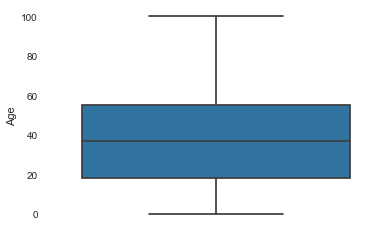

In [31]:
sns.boxplot(data=df, y='Age')

### Neighborhood Feature

In [32]:
nh = df.Neighborhood.unique()
nh.sort()
print(nh)

['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA LÚCIA' 'SANTA MARTHA' 'SANTA TEREZA

In [33]:
inconsistent_categories = set(df['Neighborhood']).difference(df['Neighborhood'])

In [34]:
df.drop(df[df['Neighborhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'].index, inplace=True)

### Schedule & Appointment Features

In [35]:
#time_format= '%Y-%m-%d %H:%M:%S'

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).astype("datetime64[ns]")
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).astype("datetime64[ns]")

In [36]:
df['AppointmentDay'] = np.where( (df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'] )

In [37]:
assert df['ScheduledDay'].dtype == 'datetime64[ns]' and df['AppointmentDay'].dtype == 'datetime64[ns]' 

In [38]:
print(f"ScheduledDay is between {df['ScheduledDay'].min()} and {df['ScheduledDay'].max()}")
print(f"AppointmentDay is between {df['AppointmentDay'].min()} and {df['AppointmentDay'].max()}")

ScheduledDay is between 2015-11-10 07:13:56 and 2016-06-08 20:07:23
AppointmentDay is between 2016-04-29 00:00:00 and 2016-06-08 20:07:23


#### Create a column to return the Waiting Days from appointment day to scheduled day

In [39]:
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']
df['WaitingDays'] = df['WaitingDays'].dt.days

In [40]:
df['WaitingDays'].aggregate([min, max]).T

min      0
max    178
Name: WaitingDays, dtype: int64

#### Create a column to Return the time of the appointment

In [41]:
df['ScheduledTime'] = df['ScheduledDay'].dt.time

In [42]:
df['ScheduledHour'] = df['ScheduledDay'].dt.hour
df['ScheduledHour'].value_counts()

7     19212
8     15348
9     12819
10    11055
14     9126
13     9036
11     8462
15     8079
16     5542
12     5420
17     2909
6      1578
18     1340
19      488
20      100
21        3
Name: ScheduledHour, dtype: int64

#### Create a column to Return the day of the week names 

In [43]:
df['ScheduledDayWeekDay'] = df['ScheduledDay'].dt.day_name()
df['ScheduledDayWeekDay'].value_counts()

Tuesday      26166
Wednesday    24262
Monday       23081
Friday       18914
Thursday     18070
Saturday        24
Name: ScheduledDayWeekDay, dtype: int64

In [44]:
df['AppointmentDayWeekName'] = df['AppointmentDay'].dt.day_name()
df['AppointmentDayWeekName'].value_counts()

Wednesday    25869
Tuesday      25638
Monday       22711
Friday       19016
Thursday     17244
Saturday        39
Name: AppointmentDayWeekName, dtype: int64

#### Create a column to Return the month names 

In [45]:
df['ScheduledDayMonthName'] = df['ScheduledDay'].dt.month_name()
df['ScheduledDayMonthName'].value_counts()

May         67415
April       25336
June        13749
March        3614
February      281
December       61
January        60
November        1
Name: ScheduledDayMonthName, dtype: int64

In [46]:
df['AppointmentDayMonthName'] = df['AppointmentDay'].dt.month_name()
df['AppointmentDayMonthName'].value_counts()

May      80834
June     26448
April     3235
Name: AppointmentDayMonthName, dtype: int64

### Handicap Feature

In [47]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
df["Handicap"].value_counts(dropna=False)

0    108280
1      2038
2       183
3        13
4         3
Name: Handicap, dtype: int64

### NoShow Feature

In [48]:
# Print summary statistics of No-show
print(df['NoShow'].describe())

count     110517
unique         2
top           No
freq       88203
Name: NoShow, dtype: object


## Check for Duplicated Rows

In [49]:
column_names = ["PatientId"] 

duplicateRowsDF = df.duplicated(subset=column_names, keep = False) 
df[duplicateRowsDF].sort_values(by='PatientId').head(6)

#df.drop_duplicates(inplace=True)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow,WaitingDays,ScheduledTime,ScheduledHour,ScheduledDayWeekDay,AppointmentDayWeekName,ScheduledDayMonthName,AppointmentDayMonthName
88585,22638656,F,2016-05-18 13:37:12,2016-06-08 00:00:00,23,INHANGUETÁ,0,0,0,0,0,1,No,20,13:37:12,13,Wednesday,Wednesday,May,June
58616,22638656,F,2016-04-14 07:23:30,2016-05-03 00:00:00,22,INHANGUETÁ,0,0,0,0,0,1,No,18,07:23:30,7,Thursday,Tuesday,April,May
49826,52168938,F,2016-04-20 11:22:15,2016-05-17 00:00:00,28,JARDIM DA PENHA,0,0,0,0,0,0,No,26,11:22:15,11,Wednesday,Tuesday,April,May
83628,52168938,F,2016-05-16 16:42:19,2016-05-16 16:42:19,28,JARDIM DA PENHA,0,0,0,0,0,0,No,0,16:42:19,16,Monday,Monday,May,May
6674,64851211,F,2016-05-13 16:22:26,2016-05-17 00:00:00,29,MARUÍPE,0,0,0,0,0,0,No,3,16:22:26,16,Friday,Tuesday,May,May
11009,64851211,F,2016-05-11 07:28:23,2016-05-13 00:00:00,29,MARUÍPE,0,0,0,0,0,0,Yes,1,07:28:23,7,Wednesday,Friday,May,May


<div class="alert alert-block alert-warning">
<b>Note:</b> PatientId's are duplicated but we won't remove them since it indicates that some of them made more than one appointment.
</div>

In [50]:
df = df.drop(["PatientId"],axis=1)

---

## Data Wrangling Summary

### Categorical columns and their associated levels.

In [51]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending = False)

(110517, 8)

,VarName,LevelsCount
3,ScheduledTime,37109
1,Neighborhood,80
6,ScheduledDayMonthName,8
4,ScheduledDayWeekDay,6
5,AppointmentDayWeekName,6
7,AppointmentDayMonthName,3
0,Gender,2
2,NoShow,2


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110517 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Gender                   110517 non-null  object        
 1   ScheduledDay             110517 non-null  datetime64[ns]
 2   AppointmentDay           110517 non-null  datetime64[ns]
 3   Age                      110517 non-null  int64         
 4   Neighborhood             110517 non-null  object        
 5   Scholarship              110517 non-null  int64         
 6   Hypertension             110517 non-null  int64         
 7   Diabetes                 110517 non-null  int64         
 8   Alcoholism               110517 non-null  int64         
 9   Handicap                 110517 non-null  int64         
 10  SMSSent                  110517 non-null  int64         
 11  NoShow                   110517 non-null  object        
 12  WaitingDays     

In [53]:
df.sort_index(axis=1, ascending=True).sample(5)

,Age,Alcoholism,AppointmentDay,AppointmentDayMonthName,AppointmentDayWeekName,Diabetes,Gender,Handicap,Hypertension,Neighborhood,NoShow,SMSSent,ScheduledDay,ScheduledDayMonthName,ScheduledDayWeekDay,ScheduledHour,ScheduledTime,Scholarship,WaitingDays
37777,26,0,2016-05-10 00:00:00,May,Tuesday,0,F,0,0,SANTA CLARA,No,1,2016-04-11 07:48:58,April,Monday,7,07:48:58,0,28
88209,49,0,2016-06-01 16:21:01,June,Wednesday,0,F,0,1,SÃO BENEDITO,No,0,2016-06-01 16:21:01,June,Wednesday,16,16:21:01,0,0
94034,7,0,2016-06-03 14:12:47,June,Friday,0,F,0,0,GURIGICA,Yes,0,2016-06-03 14:12:47,June,Friday,14,14:12:47,0,0
54131,35,0,2016-05-25 12:16:45,May,Wednesday,0,F,0,1,ILHA DO PRÍNCIPE,No,0,2016-05-25 12:16:45,May,Wednesday,12,12:16:45,1,0
91183,10,0,2016-06-06 00:00:00,June,Monday,0,M,0,0,SANTA TEREZA,Yes,0,2016-05-16 11:26:30,May,Monday,11,11:26:30,0,20


## EXPORT DATA...

In [54]:
#To CSV
df.to_csv('data/wrangle_csv.csv', index=False)

In [55]:
#To Excel
df.to_excel('data/wrangle_excel.xlsx', sheet_name='NewSheet')

#To ClipBoard
df.to_clipboard()

In [56]:
#To HTML
df.to_html('data/wrangle_html.html')

In [57]:
#To SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df.to_sql('sql_table',engine, index=False)

sqldf = pd.read_sql('sql_table',con=engine)

In [58]:
#Pandas Profiling
profile = ProfileReport(df, title='Medical Appointment NoShows Profiling Report', minimal=True)
profile.to_file("data/wrangle_profiling.html")